## Import the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

## Loading the Dataset

In [4]:
airpol= pd.read_csv(r"C:\Users\Admin\Downloads\IneuBytes\Task 2\PRSA_data_2010.1.1-2014.12.31.csv")
airpol.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
airpol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


## Exploratory Data Analysis (EDA)

In [6]:
# Check for duplicates
airpol.duplicated().sum()

0

In [7]:
airpol.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [8]:
# Handling Missing Values (Impute with mean)
airpol['pm2.5'].fillna(airpol['pm2.5'].mean(), inplace=True)

In [9]:
airpol.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [10]:
airpol = airpol.drop(columns=['No'])

In [11]:
airpol.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

In [12]:
airpol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   43824 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


## Data Visualization

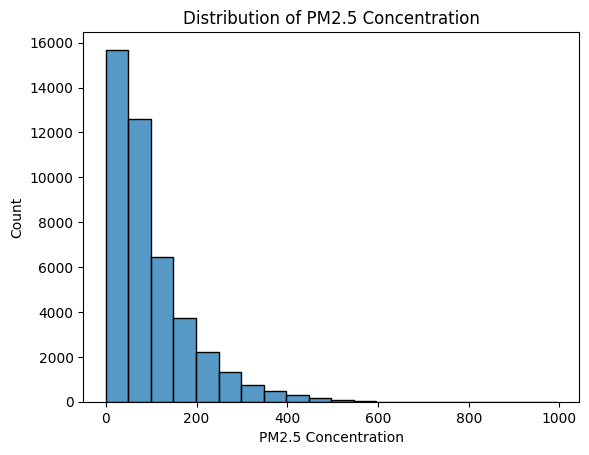

In [14]:
# Histogram of PM2.5 Concentration
sns.histplot(airpol['pm2.5'], bins=20)
plt.xlabel('PM2.5 Concentration')
plt.title('Distribution of PM2.5 Concentration')
plt.show()

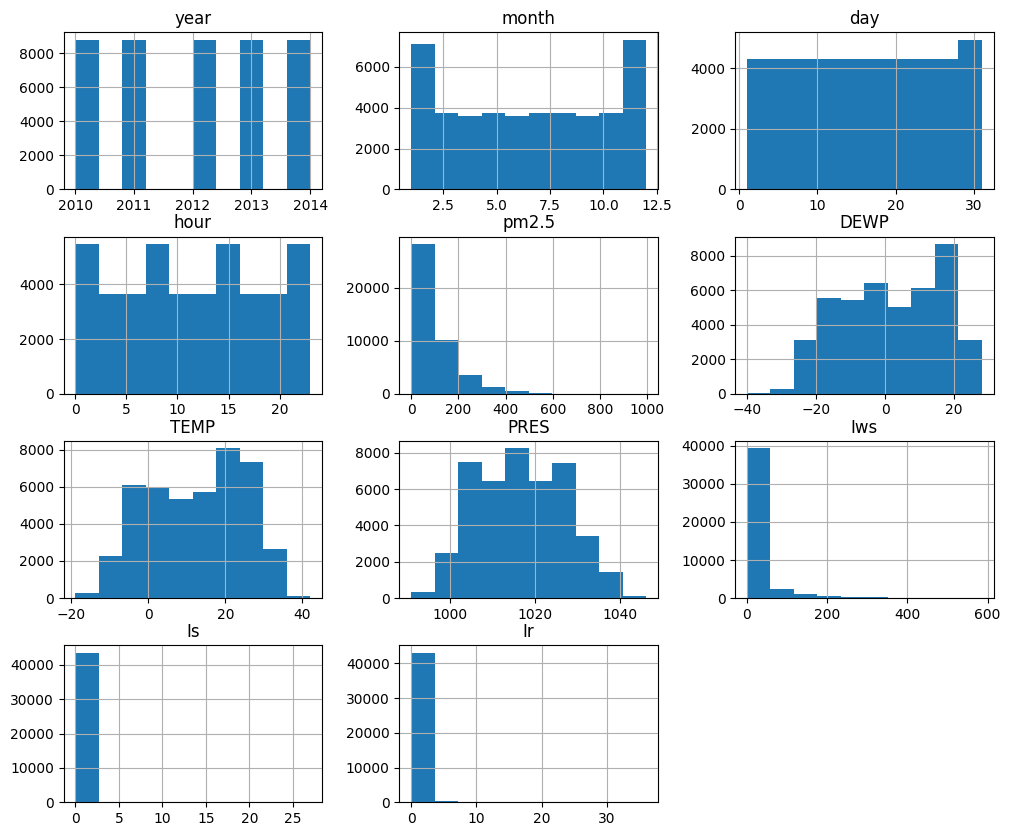

In [15]:
# Histograms of other numerical features
airpol.hist(figsize=(12, 10))
plt.show()

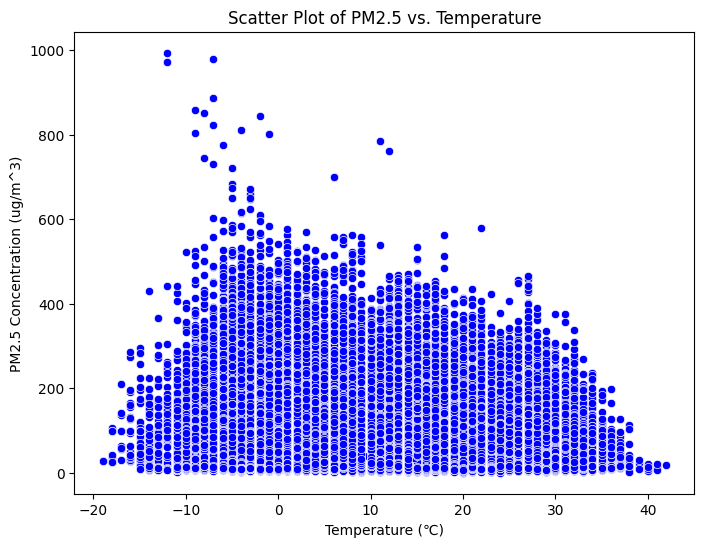

In [16]:
# Scatter Plot between PM2.5 and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='pm2.5', data=airpol, color='blue')
plt.xlabel('Temperature (℃)')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.title('Scatter Plot of PM2.5 vs. Temperature')
plt.show()

<Figure size 1600x800 with 0 Axes>

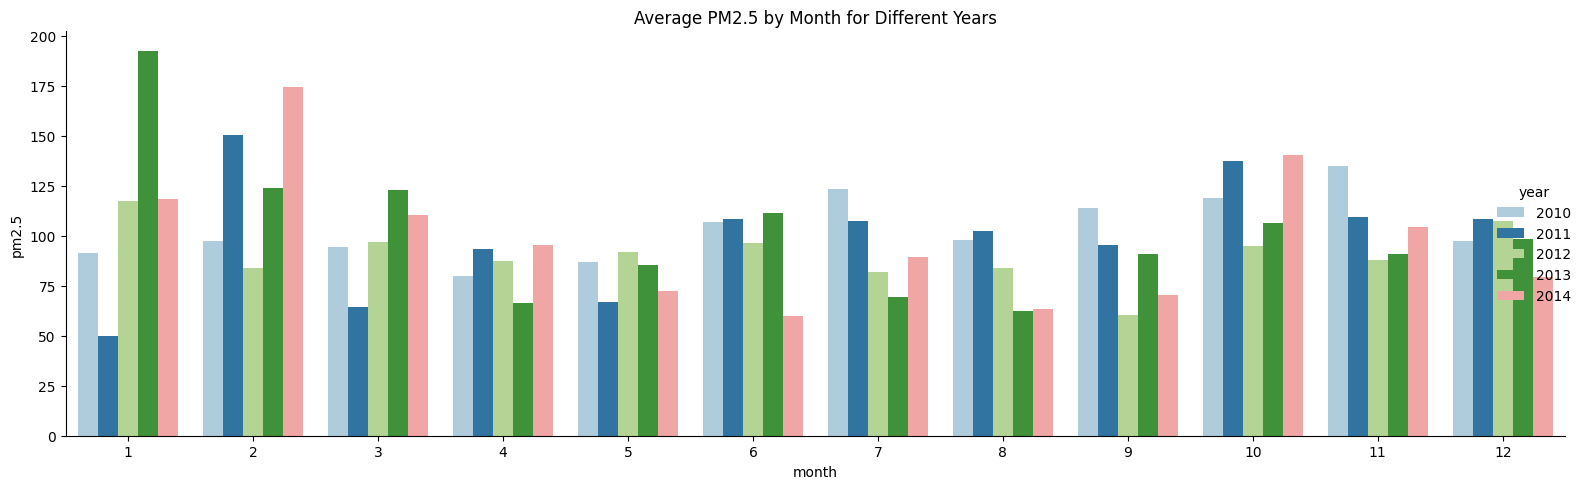

In [17]:
# Group data by year and month and calculate the mean PM2.5 concentration
month = airpol.groupby(['year', 'month'])['pm2.5'].mean().reset_index()
base_color = sns.color_palette("Paired")[9]

plt.figure(figsize=(16, 8))
sns.catplot(data=month, x='month', y='pm2.5', hue='year', kind='bar', palette='Paired', height=5, aspect=3)
plt.title('Average PM2.5 by Month for Different Years')
plt.tight_layout()
plt.show()


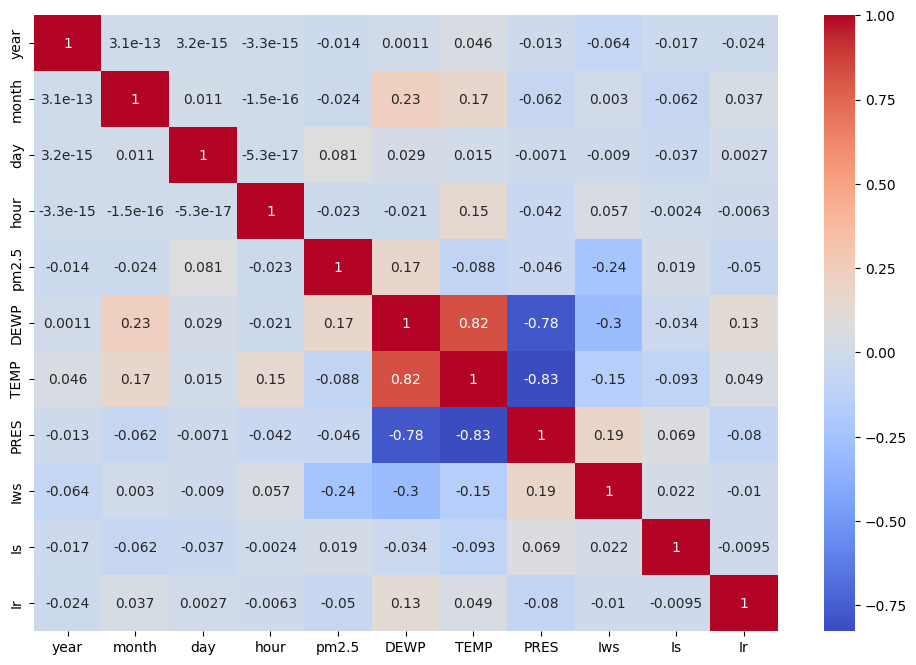

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = airpol.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Creating Dummy Variables 
airpol = pd.get_dummies(airpol, columns=['cbwd'], drop_first=True)

In [20]:
# Data Preprocessing (Using StandardScaler)
scaler = StandardScaler()
numerical_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
airpol[numerical_cols] = scaler.fit_transform(airpol[numerical_cols])

In [34]:
# Splitting the data into training and testing sets
X = airpol.drop(columns=['pm2.5'])
y = airpol['pm2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

## Ridge Regression

In [35]:
# Randomized Search for Ridge Regression
ridge_model = Ridge()
ridge_params = {'alpha': np.logspace(-3, 3, 100)}

In [36]:
# Best Ridge model from randomized search
best_ridge_model = ridge_random.best_estimator_

In [37]:
ridge_random = RandomizedSearchCV(ridge_model, param_distributions=ridge_params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
ridge_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03])},
                   scoring='neg_mean_squared_error')

In [38]:
# Make predictions on training and testing data for Ridge
ridge_train_predictions = best_ridge_model.predict(X_train)
ridge_test_predictions = best_ridge_model.predict(X_test)

In [39]:
# Calculate evaluation metrics for Ridge model
ridge_mae_train = mean_absolute_error(y_train, ridge_train_predictions)
ridge_mae_test = mean_absolute_error(y_test, ridge_test_predictions)

In [40]:
# Print the evaluation metrics for Ridge
print("Ridge Regressor - MAE (Train/Test):", ridge_mae_train, "/", ridge_mae_test)

Ridge Regressor - MAE (Train/Test): 55.70715508959892 / 55.57422089010813


In [41]:
ridge_mse_train = mean_squared_error(y_train, ridge_train_predictions)
ridge_mse_test = mean_squared_error(y_test, ridge_test_predictions)

In [42]:
# Print the evaluation metrics for Ridge
print("Ridge Regressor - MSE (Train/Test):", ridge_mse_train, "/", ridge_mse_test)

Ridge Regressor - MSE (Train/Test): 5977.184026168532 / 5864.633539419673


In [43]:
ridge_rmse_train = np.sqrt(ridge_mse_train)
ridge_rmse_test = np.sqrt(ridge_mse_test)

In [44]:
print("Ridge Regressor - RMSE (Train/Test):", ridge_rmse_train, "/", ridge_rmse_test)

Ridge Regressor - RMSE (Train/Test): 77.31225016883504 / 76.58089539447599


In [45]:
ridge_r2_train = r2_score(y_train, ridge_train_predictions)
ridge_r2_test = r2_score(y_test, ridge_test_predictions)

In [46]:
print("Ridge Regressor - R-squared (Train/Test):", ridge_r2_train, "/", ridge_r2_test)

Ridge Regressor - R-squared (Train/Test): 0.26273427884553435 / 0.2612125906791294


## Random Forest

In [48]:
# Best Random Forest model from randomized search
best_rf_model = rf_random.best_estimator_

In [49]:
# Randomized Search for Random Forest Regressor
rf_model = RandomForestRegressor()
rf_params = {
    'n_estimators': np.arange(50, 201, 10),       # Number of trees
    'max_depth': np.arange(10, 31, 5),           # Maximum depth of trees
    'min_samples_split': np.arange(2, 11, 2)    # Minimum samples to split a node
}

rf_random = RandomizedSearchCV(rf_model, param_distributions=rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': array([10, 15, 20, 25, 30]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   scoring='neg_mean_squared_error')

In [50]:
# Make predictions on training and testing data for Random Forest
rf_train_predictions = best_rf_model.predict(X_train)
rf_test_predictions = best_rf_model.predict(X_test)

In [51]:
# Calculate evaluation metrics for Random Forest model
rf_mae_train = mean_absolute_error(y_train, rf_train_predictions)
rf_mae_test = mean_absolute_error(y_test, rf_test_predictions)

##  Evaluation metrics for Random Forest Mean Absolute Error

In [52]:

print("Random Forest Regressor - MAE (Train/Test):", rf_mae_train, "/", rf_mae_test)

Random Forest Regressor - MAE (Train/Test): 9.626240775508423 / 22.040423556451213


In [53]:
rf_mse_train = mean_squared_error(y_train, rf_train_predictions)
rf_mse_test = mean_squared_error(y_test, rf_test_predictions)

##  Evaluation metrics for Random Forest Mean Standard Error

In [54]:
# Print the evaluation metrics for Random Forest
print("Random Forest Regressor - MSE (Train/Test):", rf_mse_train, "/", rf_mse_test)

Random Forest Regressor - MSE (Train/Test): 240.79726334841527 / 1252.1303574821723


In [55]:
rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_test = np.sqrt(rf_mse_test)

In [56]:
# Print the evaluation metrics for Random Forest
print("Random Forest Regressor - RMSE (Train/Test):", rf_rmse_train, "/", rf_rmse_test)

Random Forest Regressor - RMSE (Train/Test): 15.51764361455744 / 35.385454038095546


In [57]:
rf_r2_train = r2_score(y_train, rf_train_predictions)
rf_r2_test = r2_score(y_test, rf_test_predictions)

In [58]:
# Print the evaluation metrics for Random Forest
print("Random Forest Regressor - R-squared (Train/Test):", rf_r2_train, "/", rf_r2_test)

Random Forest Regressor - R-squared (Train/Test): 0.9702984604058792 / 0.8422649707405575


In [59]:
# 10-fold cross-validation for Ridge Regressor
ridge_cv_scores = cross_val_score(best_ridge_model, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_cv_rmse_scores = np.sqrt(-ridge_cv_scores)

In [60]:
# Calculate the average cross-validation RMSE scores
ridge_cv_rmse_mean = ridge_cv_rmse_scores.mean()

In [61]:
# Print the average cross-validation RMSE scores for Ridge
print("Ridge Regressor - Average Cross-Validation RMSE:", ridge_cv_rmse_mean)

Ridge Regressor - Average Cross-Validation RMSE: 78.08092800262746


In [62]:
# 10-fold cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
rf_cv_rmse_scores = np.sqrt(-rf_cv_scores)

In [63]:
# Calculate the average cross-validation RMSE scores
rf_cv_rmse_mean = rf_cv_rmse_scores.mean()

In [64]:
# Print the average cross-validation RMSE scores for Random Forest
print("Random Forest Regressor - Average Cross-Validation RMSE:", rf_cv_rmse_mean)

Random Forest Regressor - Average Cross-Validation RMSE: 70.3302732370345
